In [83]:
import numpy as np
import matplotlib.pyplot as plt
import sympy.plotting.plot as symplot
import sympy as sym
from IPython.display import display, Math

In [2]:
x = sym.symbols('x')
fx = x**3
lim_pnt = 1.2
lim = sym.limit(fx ,x ,lim_pnt)
display(Math("\\lim_{x\\to%g} %s = %s"%(lim_pnt ,sym.latex(fx) ,lim)))

<IPython.core.display.Math object>

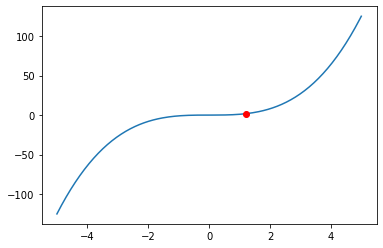

In [5]:
fxx = sym.lambdify(x ,fx)   #input value of x and get fx(x) as output
xx = np.linspace(-5 ,5 ,200)

plt.plot(xx ,fxx(xx))
plt.plot(lim_pnt ,lim ,'ro')
plt.show()

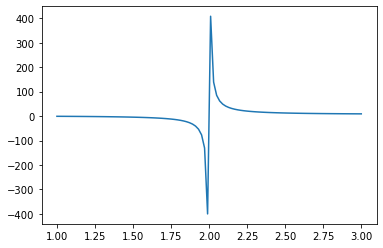

In [11]:
fx = (x**2)/(x-2)
fxx = sym.lambdify(x ,fx)
xx = np.linspace(1 ,3 ,102)
lim_pnt = 2
lim = sym.limit(fx ,x ,lim_pnt ,dir='-')

plt.plot(xx ,fxx(xx))
plt.show()


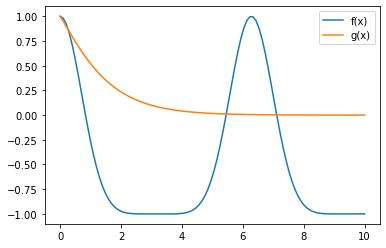

In [20]:
x = sym.symbols('x')
y = sym.sqrt(x+1)* sym.exp(-x)
g = sym.cos(x + sym.sin(x))
yy = sym.lambdify(x ,y)
gg = sym.lambdify(x ,g)
xx = np.linspace(0 ,10 ,102)
plt.plot(xx ,gg(xx) ,label = 'f(x)')
plt.plot(xx ,yy(xx) ,label = 'g(x)')

plt.legend()
plt.show()

In [48]:
limpnt = 5
lmty = sym.limit(y ,x ,limpnt)
lmtg = sym.limit(g ,x ,limpnt)
r = y/g
lmtr = sym.limit(r ,x ,limpnt)
lmtr == lmty/lmty
display(Math('\\frac{\\lim_{x\\to%g} %s}{\\lim_{x\\to%g} %s} = \\lim_{x\\to%g} {\\frac{%s}{%s}}' %(limpnt ,sym.latex(y) ,limpnt ,sym.latex(g) ,limpnt ,sym.latex(y) ,sym.latex(g))))

<IPython.core.display.Math object>

# Piecewise functions 

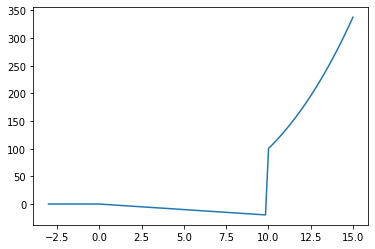

In [64]:
x = sym.symbols('x')
p1 = 0
p2 = -2*x
p3 = x**3/10

fx = sym.Piecewise((p1 ,x<0) ,(p2 ,(x>=0)&(x<10)) ,(p3 ,x>=3))
fxx = sym.lambdify(x ,fx)
xx = np.linspace(-3 ,15 ,102)
plt.plot(xx ,fxx(xx))
plt.show()

In [53]:
# make a graph in xkcd style

<lambdifygenerated-41>:2: RuntimeWarning: invalid value encountered in log
  return (select([less_equal(x, 0),True], [x**3,log(x)/log(2)], default=nan))
No handles with labels found to put in legend.


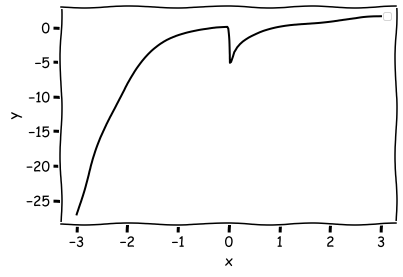

In [71]:
x = sym.symbols('x')
p1 = x**3
p2 = sym.log(x ,2)

fx = sym.Piecewise((p1 ,x<=0) ,(p2 ,x>0) )
fxx = sym.lambdify(x ,fx)
xx = np.linspace(-3 ,3 ,102)

with plt.xkcd():
    plt.plot(xx ,fxx(xx) ,'k')
plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

# Video 121 : Derivatives

In [73]:
x = sym.symbols('x')
y = x**2
sym.diff(y)

2*x

In [75]:
# Leibnitz notation
display(Math('f(x) = %s ,\\quad \\frac{df}{dx}=%s' \
            %(sym.latex(y) ,sym.latex(sym.diff(y)))))

<IPython.core.display.Math object>

In [76]:
# Lagrange notation
display(Math('f(x) = %s ,\\quad f\'=%s' \
            %(sym.latex(y) ,sym.latex(sym.diff(y)))))

<IPython.core.display.Math object>

In [78]:
# Newton notation
display(Math('f(x) = %s ,\\quad \\dot{f}=%s' \
            %(sym.latex(y) ,sym.latex(sym.diff(y)))))

<IPython.core.display.Math object>

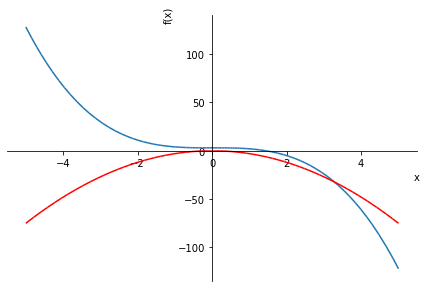

In [85]:
fx = 3 - x**3
p = symplot(fx ,(x ,-5 ,5) ,show = False)
p.extend(symplot(sym.diff(fx) ,(x ,-5 ,5) ,show = False))
p[1].line_color = 'r'

p.show()

In [105]:
x = sym.symbols('x')
fx = 3 + 2*x - 5*(x**2) + 7*(x**4)
gx = 4*(x**2) + x**5
display(Math('(f+g)\'\\quad = \\quad f\' + g\'\\quad=\\quad %s' \
            %(sym.latex(sym.diff(fx+gx))) ))
display(Math('(f \\times g)\'\\quad \\neq \\quad f\' \\times g\'\\quad \\neq \\quad %s' \
            %(sym.latex(sym.simplify(fx*gx))) ))
display(Math('(f \\times g)\'\\quad = \\quad f\' \\times g + g\' \\times f \\quad=\\quad %s' \
            %(sym.latex(  sym.simplify(sym.diff(fx)*gx + sym.diff(gx)*fx) ))  ))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

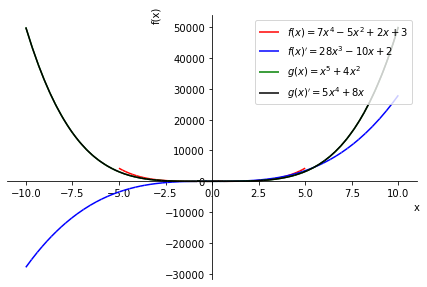

In [112]:
#plots and graphs

p = symplot(fx,(x,-5,5),show=False)  #fx
p[0].label = '$f(x) = %s$' %sym.latex(fx) 

p.extend( symplot(sym.diff(fx),show=False) )   #fx'
p[1].label = '$f(x)\' = %s$' %sym.latex(sym.diff(fx))

p.extend( symplot(sym.diff(gx),show=False) )   #gx
p[2].label = '$g(x) = %s$' %sym.latex(gx)

p.extend( symplot(sym.diff(gx),show=False) )   #gx'
p[3].label = '$g(x)\' = %s$' %sym.latex(sym.diff(gx))

# some plotting adjustments
# p.ylim = [-5,5]
# p.xlim = [-3,3]
p[0].line_color = 'r'
p[1].line_color = 'b'
p[2].line_color = 'g'
p[3].line_color = 'k'

p.legend = True # activate the legend

# and show the plot
p.show()